In [1]:
import numpy as np 
import pandas as pd

import plotly.io as pio
pio.templates

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Boston dataset from OpenML 
from sklearn.datasets import fetch_openml

load_boston = fetch_openml(name='boston', version=1, as_frame=True)
X = load_boston.data 
y = load_boston.target 

data = pd.DataFrame(X, columns=load_boston.feature_names) 
data["SalePrice"] = y 
data.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Pre-Processing :-

In [3]:
print(load_boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [4]:
print(data.shape) 

(506, 14)


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CRIM       506 non-null    float64 
 1   ZN         506 non-null    float64 
 2   INDUS      506 non-null    float64 
 3   CHAS       506 non-null    category
 4   NOX        506 non-null    float64 
 5   RM         506 non-null    float64 
 6   AGE        506 non-null    float64 
 7   DIS        506 non-null    float64 
 8   RAD        506 non-null    category
 9   TAX        506 non-null    float64 
 10  PTRATIO    506 non-null    float64 
 11  B          506 non-null    float64 
 12  LSTAT      506 non-null    float64 
 13  SalePrice  506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,SalePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


## EDA :-

In [7]:
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
dtype: int64

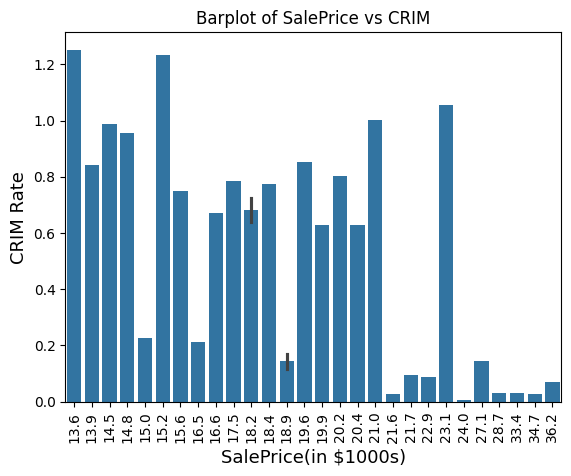

In [8]:
# Plot boxplot using the first 30 rows

sns.barplot(x=data['SalePrice'][:30], y=data['CRIM'][:30])
plt.title('Barplot of SalePrice vs CRIM')
plt.xlabel('SalePrice(in $1000s)', fontsize=13)
plt.ylabel('CRIM Rate', fontsize=13)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'SalePrice(in $1000s)')

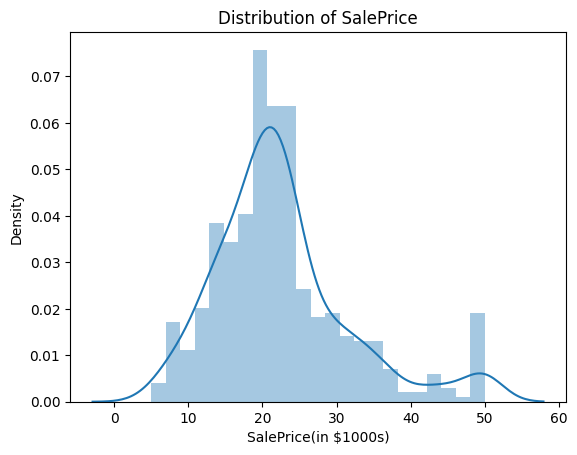

In [9]:
sns.distplot(data['SalePrice'])
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice(in $1000s)')

In [10]:
print("Skewness: %f" % data['SalePrice'].skew())

Skewness: 1.108098


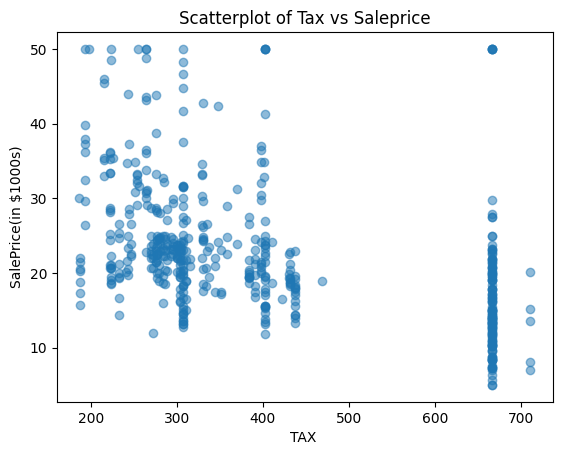

In [11]:
plt.scatter(x = data['TAX'], y = data['SalePrice'],alpha=0.5)
plt.title('Scatterplot of Tax vs Saleprice')
plt.ylabel('SalePrice(in $1000s)')
plt.xlabel('TAX ')
plt.show()

## Data Correlation :-

In [12]:
# NOT NEEDED
# plt.figure(figsize=(10,10))
# cor = data.corr()
# sns.heatmap(cor, annot=True)
# plt.show()

## Model Building :-

In [13]:
from sklearn.model_selection import train_test_split 

X = data.drop("SalePrice", axis=1) 
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest to get feature importances
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
print(importances)

RM         0.470495
LSTAT      0.346164
DIS        0.056169
CRIM       0.036419
NOX        0.018004
PTRATIO    0.015616
TAX        0.014581
AGE        0.013392
B          0.013213
INDUS      0.008165
RAD        0.004943
ZN         0.001441
CHAS       0.001398
dtype: float64


In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [16]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 

In [17]:
# One-hot encode categorical columns in both train and test sets
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Ensure columns match between train and test
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Fit the model
lr.fit(X_train_encoded, y_train)
predictions = lr.predict(X_test_encoded)


In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, predictions) 
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", round(mse , 3))
print("Root Mean Squared Error:", round(rmse,3))
print("R2 Score:", round(r2,3))

Mean Squared Error: 24.818
Root Mean Squared Error: 4.982
R2 Score: 0.662


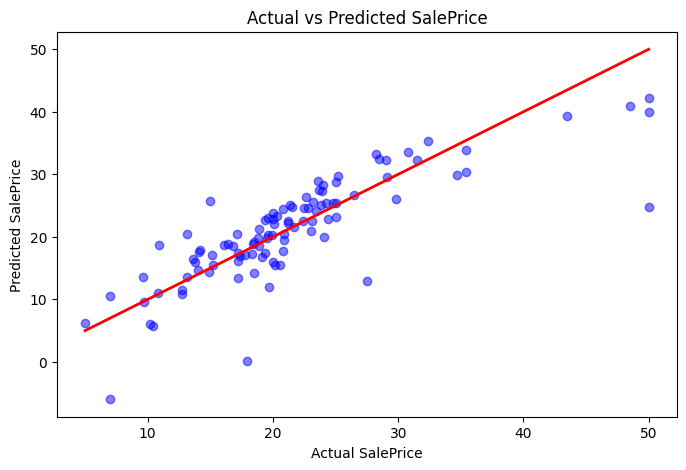

In [19]:
# Plot actual vs predicted SalePrice values
plt.figure(figsize=(8,5))
plt.scatter(x = y_test, y = predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # 45-degree line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()

## Prediction :-

In [20]:
rm = float(input("Enter RM (average no. of rooms per dwelling): "))
lstat = float(input("Enter LSTAT (% lower status of population): "))
dis = float(input("Enter DIS (weighted distances to 5 Boston employment centres): "))
crime = float(input("Enter CRIM (per capita crime rate by town): "))

# Create a DataFrame for prediction (other features set to mean)
input_data = X_train_encoded.mean().to_dict()
input_data['RM'] = rm
input_data['LSTAT'] = lstat
input_data['DIS'] = dis
input_data['CRIM'] = crime

input_df = pd.DataFrame([input_data])

# Predict SalePrice
predicted_price = lr.predict(input_df)[0]
print(f"Predicted SalePrice: {round(predicted_price, 2)}")

Predicted SalePrice: 27.75
